In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Metrik Retrieval:
Model: TF-IDF
Accuracy: 0.200
Precision: 1.000
Recall: 0.200
F1-score: 0.333
Metrik disimpan di /content/drive/MyDrive/PENALARAN KOMPUTER FIX/data/eval/retrieval_metrics.csv

Metrik Prediksi (Simulasi):
Model: Simulated
Accuracy: 0.200
Precision: 0.080
Recall: 0.200
F1-score: 0.114
Metrik disimpan di /content/drive/MyDrive/PENALARAN KOMPUTER FIX/data/eval/prediction_metrics.csv


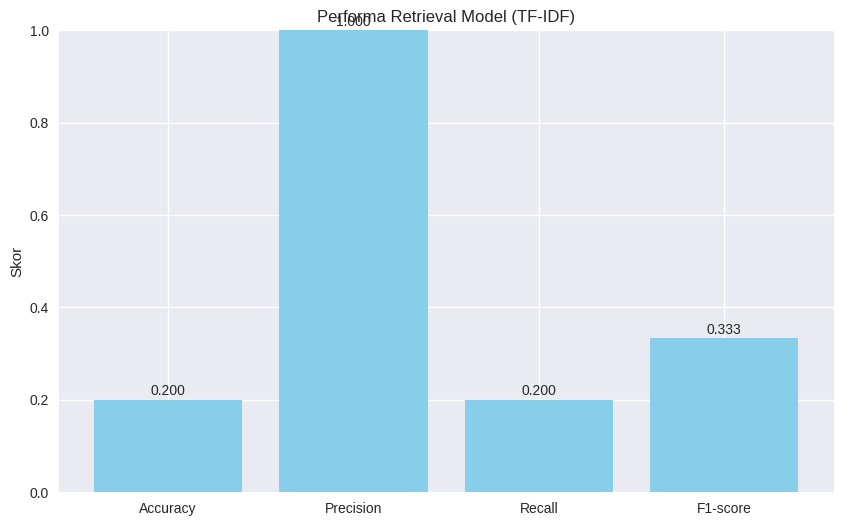

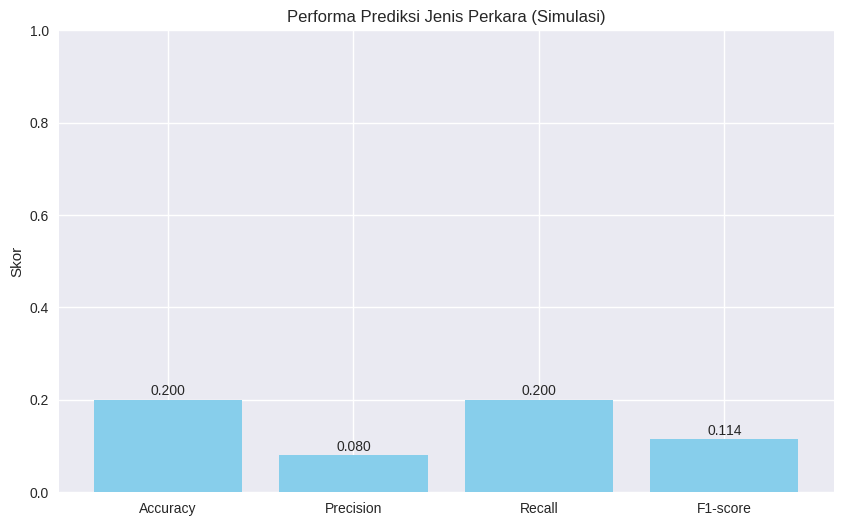


Analisis Kegagalan Retrieval:
Query ID: query_001
Ground Truth: zaf04be0380ca49e8760303830343433
Top 5 Case IDs: ['zaf04c05450ae168ad29313232393536', 'zaf04b3abeac93b6b6df313232303132', 'zaf04b3b297d83949f16313232333131', 'zaf04c017a89dc30943a313230323438', 'zaf04bf54310144c9b17313033353231']
Query Text: a
i
s
e
n
o
d
n
I
k
i
l
b
u
p
e
a
R
i
s
g e
n
n
o
u
d
g
n
A
I
h k
a i
l
m b
u
a
p
k
Direktori Putusa...
Jenis Perkara: perkara pidana
--------------------------------------------------
Query ID: query_002
Ground Truth: zaf04c03bed430b49b20313231393031
Top 5 Case IDs: ['zaf04b3b297d83949f16313232333131', 'zaf04c017a89dc30943a313230323438', 'zaf04c05450ae168ad29313232393536', 'zaf04b3abeac93b6b6df313232303132', 'zaf04bf54310144c9b17313033353231']
Query Text: a
i
s
e
n
o
d
n
I
k
i
l
b
u
p
e
a
R
i
s
g e
n
n
o
u
d
g
n
A
I
h k
a i
l
m b
u
a
p
k
Direktori Putusa...
Jenis Perkara: perkara perdata
--------------------------------------------------
Query ID: query_004
Ground Truth: zaf04be947f6

In [16]:
import pandas as pd
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import os
import warnings

# Membaca data
def load_data():
    queries_path = '/content/drive/MyDrive/PENALARAN KOMPUTER FIX/data/eval/queries.json'
    predictions_path = '/content/drive/MyDrive/PENALARAN KOMPUTER FIX/data/results/predictions.csv'
    cases_path = '/content/drive/MyDrive/PENALARAN KOMPUTER FIX/cases.csv'

    # Membaca queries.json
    with open(queries_path, 'r', encoding='utf-8') as f:
        queries = json.load(f)
    queries_df = pd.DataFrame(queries)

    # Membaca predictions.csv
    predictions_df = pd.read_csv(predictions_path)

    # Membaca cases.csv
    cases_df = pd.read_csv(cases_path)

    return queries_df, predictions_df, cases_df

# Normalisasi case_id
def normalize_case_id(case_id):
    return case_id.replace("(1)", "").strip()

# Evaluasi retrieval
def evaluate_retrieval(queries_df, predictions_df):
    y_true = []
    y_pred = []

    for _, query in queries_df.iterrows():
        query_id = query['query_id']
        ground_truth = normalize_case_id(query['ground_truth_case_id'])

        pred_row = predictions_df[predictions_df['query_id'] == query_id]
        if not pred_row.empty:
            top_5_case_ids = [normalize_case_id(cid) for cid in pred_row['top_5_case_ids'].iloc[0].split(',')]
            y_true.append(1)
            y_pred.append(1 if ground_truth in top_5_case_ids else 0)
        else:
            y_true.append(1)
            y_pred.append(0)
            warnings.warn(f"Query ID {query_id} tidak ditemukan di predictions.csv")

    # Hitung metrik
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return {
        'Model': 'TF-IDF',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

# Simulasi evaluasi prediksi
def evaluate_prediction(queries_df, predictions_df, cases_df):
    y_true = []
    y_pred = []

    for _, query in queries_df.iterrows():
        query_id = query['query_id']
        ground_truth_case_id = normalize_case_id(query['ground_truth_case_id'])

        # Cari ground truth jenis_perkara dari cases.csv
        case_row = cases_df[cases_df['case_id'] == ground_truth_case_id]
        if not case_row.empty:
            true_jenis_perkara = case_row['jenis_perkara'].iloc[0]
        else:
            true_jenis_perkara = 'Unknown'

        # Cari prediksi dari top_1 case_id
        pred_row = predictions_df[predictions_df['query_id'] == query_id]
        if not pred_row.empty:
            top_1_case_id = normalize_case_id(pred_row['top_5_case_ids'].iloc[0].split(',')[0])
            pred_case_row = cases_df[cases_df['case_id'] == top_1_case_id]
            if not pred_case_row.empty:
                pred_jenis_perkara = pred_case_row['jenis_perkara'].iloc[0]
            else:
                pred_jenis_perkara = 'Unknown'
        else:
            pred_jenis_perkara = 'Unknown'

        y_true.append(true_jenis_perkara)
        y_pred.append(pred_jenis_perkara)

    # Hitung metrik
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    return {
        'Model': 'Simulated',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

# Simpan metrik ke CSV
def save_metrics(metrics, output_path):
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv(output_path, index=False)
    print(f"Metrik disimpan di {output_path}")

# Visualisasi bar chart
def plot_metrics(metrics, title):
    labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    values = [metrics['Accuracy'], metrics['Precision'], metrics['Recall'], metrics['F1-score']]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')
    plt.title(title)
    plt.ylabel('Skor')
    plt.ylim(0, 1)
    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
    plt.show()

# Analisis kegagalan
def error_analysis(queries_df, predictions_df, cases_df):
    errors = []
    for _, query in queries_df.iterrows():
        query_id = query['query_id']
        ground_truth = normalize_case_id(query['ground_truth_case_id'])

        pred_row = predictions_df[predictions_df['query_id'] == query_id]
        if not pred_row.empty:
            top_5_case_ids = [normalize_case_id(cid) for cid in pred_row['top_5_case_ids'].iloc[0].split(',')]
            if ground_truth not in top_5_case_ids:
                case_row = cases_df[cases_df['case_id'] == ground_truth]
                jenis_perkara = case_row['jenis_perkara'].iloc[0] if not case_row.empty else 'Unknown'
                errors.append({
                    'query_id': query_id,
                    'ground_truth_case_id': ground_truth,
                    'top_5_case_ids': top_5_case_ids,
                    'query_text': query['query_text'][:100],
                    'jenis_perkara': jenis_perkara
                })
    return errors

# Main function
def main():
    # Buat direktori output
    os.makedirs('/content/drive/MyDrive/PENALARAN KOMPUTER FIX/data/eval', exist_ok=True)

    # Load data
    queries_df, predictions_df, cases_df = load_data()

    # Evaluasi retrieval
    retrieval_metrics = evaluate_retrieval(queries_df, predictions_df)
    print("Metrik Retrieval:")
    for metric, value in retrieval_metrics.items():
        if isinstance(value, (int, float)):
            print(f"{metric}: {value:.3f}")
        else:
            print(f"{metric}: {value}")

    # Simpan metrik retrieval
    save_metrics(retrieval_metrics, '/content/drive/MyDrive/PENALARAN KOMPUTER FIX/data/eval/retrieval_metrics.csv')

    # Evaluasi prediksi (simulasi)
    prediction_metrics = evaluate_prediction(queries_df, predictions_df, cases_df)
    print("\nMetrik Prediksi (Simulasi):")
    for metric, value in prediction_metrics.items():
        if isinstance(value, (int, float)):
            print(f"{metric}: {value:.3f}")
        else:
            print(f"{metric}: {value}")

    # Simpan metrik prediksi
    save_metrics(prediction_metrics, '/content/drive/MyDrive/PENALARAN KOMPUTER FIX/data/eval/prediction_metrics.csv')

    # Visualisasi
    plot_metrics(retrieval_metrics, 'Performa Retrieval Model (TF-IDF)')
    plot_metrics(prediction_metrics, 'Performa Prediksi Jenis Perkara (Simulasi)')

    # Analisis kegagalan
    errors = error_analysis(queries_df, predictions_df, cases_df)
    print("\nAnalisis Kegagalan Retrieval:")
    if errors:
        for error in errors:
            print(f"Query ID: {error['query_id']}")
            print(f"Ground Truth: {error['ground_truth_case_id']}")
            print(f"Top 5 Case IDs: {error['top_5_case_ids']}")
            print(f"Query Text: {error['query_text']}...")
            print(f"Jenis Perkara: {error['jenis_perkara']}")
            print("-" * 50)
    else:
        print("Tidak ada kegagalan ditemukan.")

if __name__ == "__main__":
    main()